In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/演習問題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/演習問題_データアナリティクス基礎\第10章演習問題_乱数で発生させて分布の基本統計量.xlsx
1 ../csv/演習問題_データアナリティクス基礎\第2章演習問題_クレームデータ.xlsx
2 ../csv/演習問題_データアナリティクス基礎\第3章演習問題_職場ストレス.xlsx
3 ../csv/演習問題_データアナリティクス基礎\第4章演習問題_児童のネット利用時間.xlsx
4 ../csv/演習問題_データアナリティクス基礎\第5章演習問題_生鮮野菜の購入額.xlsx
5 ../csv/演習問題_データアナリティクス基礎\第7章演習問題_授業効果の検証.xlsx
6 ../csv/演習問題_データアナリティクス基礎\第8章演習問題1_健康食品・化粧品販売額.xlsx
7 ../csv/演習問題_データアナリティクス基礎\第8章演習問題2_百貨店の衣料品売上高.xlsx
8 ../csv/演習問題_データアナリティクス基礎\第9章演習問題_自由記述データ＆形態素解析データ.xlsx


In [5]:
df = pd.read_excel(files[3])
print(df.columns)
df.columns = ['id', 'gender', 'usage_time']
df.info()
df.head()

Index(['ID', '性別', 'ネット利用時間'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          200 non-null    int64  
 1   gender      200 non-null    object 
 2   usage_time  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


,id,gender,usage_time
0,1,男,0.9
1,2,男,0.5
2,3,男,0.0
3,4,男,0.2
4,5,男,0.9


利用時間が1時間以上2時間未満の人数: 51

In [17]:
df[(df['usage_time'] >= 1) & (df['usage_time'] < 2)].count()['id']

51

男女別の利用時間の分布: 男女ともに右裾

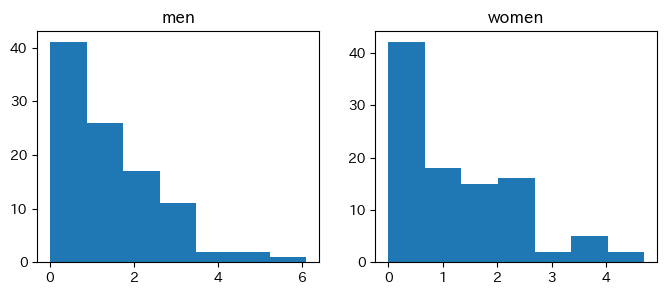

In [67]:
men = df.query('gender == "男"')['usage_time']
women = df.query('gender == "女"')['usage_time']
data = {'men': men, 'women': women,}

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, (k, v) in zip(axs, data.items()):
    ax.hist(v, bins=7)
    ax.set_title(k)

女子児童の中央値: 0.9

In [68]:
women_statistics = df.query('gender == "女"').describe()
women_statistics

,id,usage_time
count,100.000000,100.000000
mean,150.500000,1.224000
std,29.011492,1.147339
min,101.000000,0.000000
25%,125.750000,0.275000
50%,150.500000,0.900000
75%,175.250000,2.025000
max,200.000000,4.700000


女子の四分位範囲: 1.75

In [69]:
women_statistics.loc['75%', 'usage_time'] - women_statistics.loc['25%', 'usage_time']

1.75

男子の利用時間最大値の偏差値: 89.7

In [84]:
mu = df.query('gender == "男"')['usage_time'].mean()
sigma = df.query('gender == "男"')['usage_time'].std(ddof=0)
max_value = df.query('gender == "男"')['usage_time'].max()
print(mu, sigma, max_value)

print(f'{(max_value - round(mu, 2)) / round(sigma, 2) * 10 + 50:.01f}')

1.38 1.1917214439624721 6.1
89.7


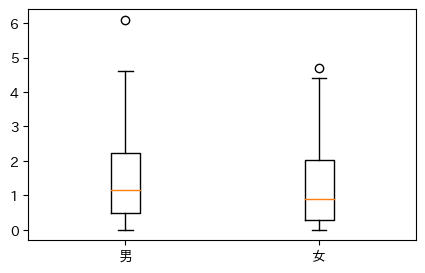

In [96]:
plt.figure(figsize=(5, 3))
plt.boxplot([men, women], labels=['男', '女'])
plt.show()